# <span style="color: red;">DONT FORGET TO RESET CITY COUNT!!</span>

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Confirm sufficient city count
len(cities)>10

True

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [29]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

newCities = []
cloudiness = []
country = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
        
print('Beginning Data Retrieval')
print('-----------------------------')


for city in cities:
      
    response = requests.get(query_url + city).json()
    
    try:
        print(f'Processing Record {1} of Set {1} | {city}')
        
        cloudiness.append(response['clouds']['all']) #percentage
        country.append(response['sys']['country'])
        dates.append(datetime.today().strftime('%m/%d/%Y'))
        humidity.append(response['main']['humidity']) #percentage
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed']) #miles/hr
        newCities.append(city)
        
    except (KeyError):
        print(f'City not found. Skipping {city}...')


print('-----------------------------')
print('Data Retrieval Complete')  
print('-----------------------------')    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | swan river
Processing Record 1 of Set 1 | samusu
City not found. Skipping samusu...
Processing Record 1 of Set 1 | busselton
Processing Record 1 of Set 1 | apiai
Processing Record 1 of Set 1 | sitka
Processing Record 1 of Set 1 | kourou
Processing Record 1 of Set 1 | huangpu
Processing Record 1 of Set 1 | mataura
Processing Record 1 of Set 1 | upernavik
Processing Record 1 of Set 1 | riyadh
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping barentsburg...
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | nikolskoye
Processing Record 1 of Set 1 | atuona
Processing Record 1 of Set 1 | iquitos
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
cityData = pd.DataFrame({'City' : (newCities),
                       'Cloudiness' : (cloudiness),
                       'Country' : (country),
                       'Date' : dates,
                       'Humidity' : (humidity),
                       'Latitude' : (lat),
                       'Longitude' : (lng),
                       'Max Temp' : (max_temp),
                       'Wind Speed' : (wind_speed)
})
cityData.count()

City          13
Cloudiness    13
Country       13
Date          13
Humidity      13
Latitude      13
Longitude     13
Max Temp      13
Wind Speed    13
dtype: int64

In [31]:
cityData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,swan river,97,CA,01/23/2020,89,52.11,-101.27,15.84,1.63
1,busselton,0,AU,01/23/2020,50,-33.65,115.33,60.01,9.69
2,apiai,100,BR,01/23/2020,98,-24.51,-48.84,62.87,2.77
3,sitka,90,US,01/23/2020,65,57.05,-135.33,44.60,12.75
4,kourou,40,GF,01/23/2020,55,5.16,-52.65,86.00,10.29


In [32]:
cityData.to_csv(output_data_file, index = False)

PermissionError: [Errno 13] Permission denied: '../output_data/cities.csv'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [33]:
cloudiness = cityData['Cloudiness']
mdy = datetime.today().strftime('%m/%d/%Y')
humidity = cityData['Humidity']
latitude = cityData['Latitude']
longitude = cityData['Longitude']
max_temp = cityData['Max Temp']
wind_speed = cityData['Wind Speed']


#### Latitude vs. Temperature Plot

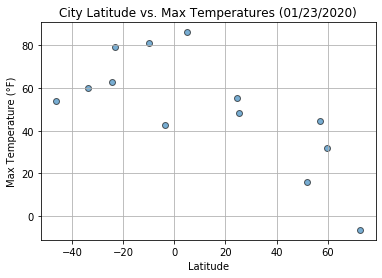

In [34]:
plt.scatter(latitude, max_temp, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Max Temperatures ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
plt.scatter(latitude, max_temp, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Max Temperatures ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression